In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


# import our libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# data wrangling

In [3]:
# load our data in dataframe 
df=pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# this case mean they have same case twice user appear show or no show twice 
df[['PatientId','No-show']].duplicated().sum()

38710

In [8]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)

In [9]:
df.shape

(71817, 14)

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181700e+04,7.181700e+04,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000
mean,1.466294e+14,5.666495e+06,36.526978,0.095534,0.195065,0.070958,0.025036,0.020135,0.335561
std,2.544927e+14,7.313144e+04,23.378518,0.293954,0.396254,0.256757,0.156235,0.155337,0.472190
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175978e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189717e+13,5.672884e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716568e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# Show age=-1 row 
mask=df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# drop age = -1 
df.drop(index=99832,inplace=True)

In [13]:
df.drop(columns=['PatientId', 'AppointmentID','AppointmentDay','ScheduledDay'],axis="columns",inplace=True)

# EDA

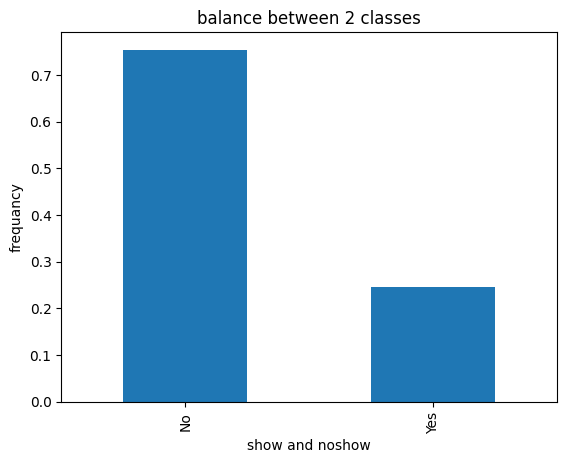

In [14]:
# see differnce between show and no show
df['No-show'].value_counts(normalize=True).plot(kind="bar",xlabel="show and noshow",ylabel="frequancy",title="balance between 2 classes");

In [15]:
df['No-show'].value_counts(normalize=True)

No-show
No     0.754052
Yes    0.245948
Name: proportion, dtype: float64

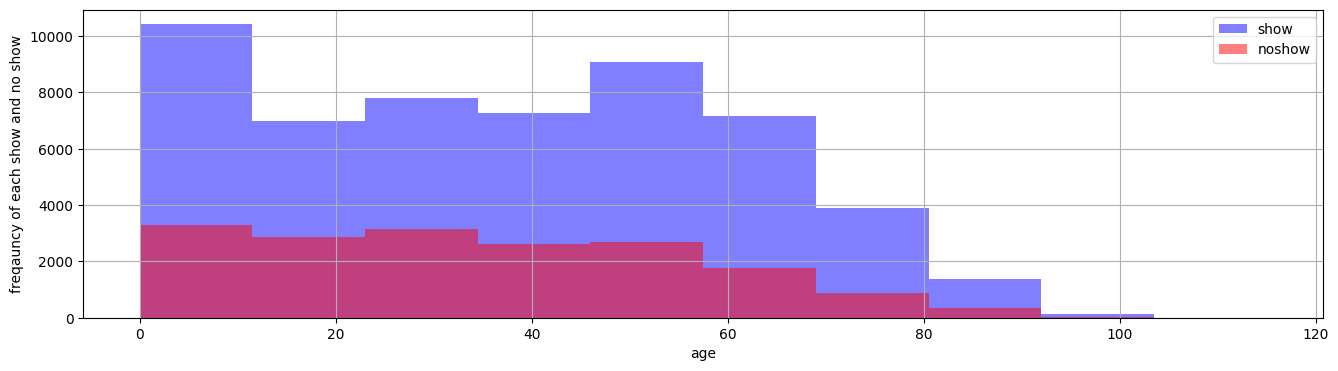

In [16]:
# does age effect attendance 
show=df['No-show']=='No'
noshow=df['No-show']=='Yes'
def attendance(df,col_name,attende,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=0.5,bins=10,color="blue",label="show")
    df[col_name][noshow].hist(alpha=0.5,bins=10,color="red",label="noshow")
    plt.legend()
    plt.ylabel("freqauncy of each show and no show")
    plt.xlabel("age")
    plt.show();
attendance(df,'Age',show,noshow)

In [17]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


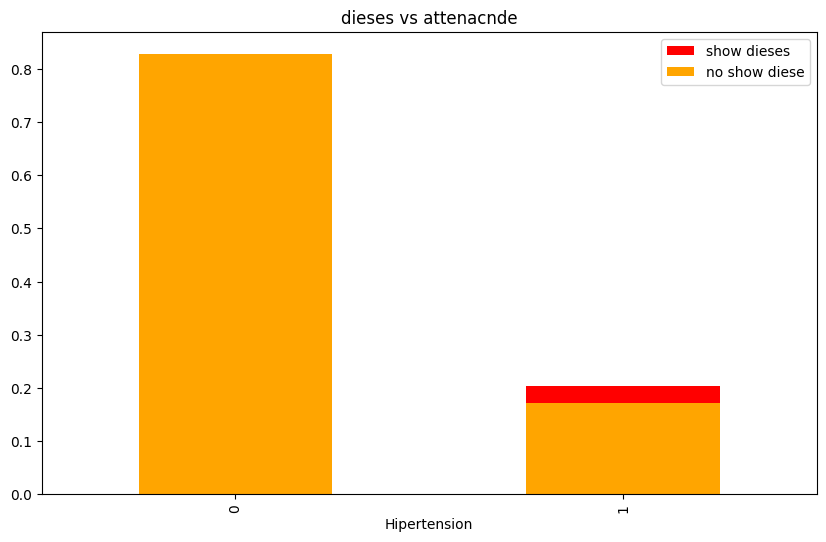

In [18]:
fig,ax=plt.subplots(figsize=(10,6))
df["Hipertension"][show].value_counts(normalize=True).plot(kind="bar",label="show dieses",ax=ax,color="red")
df["Hipertension"][noshow].value_counts(normalize=True).plot(kind="bar",label="no show diese",ax=ax,color="orange")
plt.legend()
plt.title("dieses vs attenacnde");

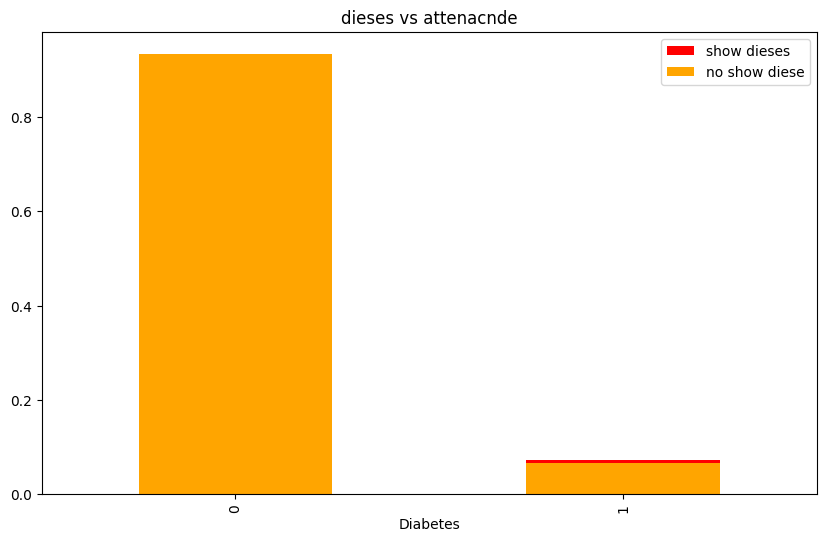

In [19]:
fig,ax=plt.subplots(figsize=(10,6))
df["Diabetes"][show].value_counts(normalize=True).plot(kind="bar",label="show dieses",ax=ax,color="red")
df["Diabetes"][noshow].value_counts(normalize=True).plot(kind="bar",label="no show diese",ax=ax,color="orange")
plt.legend()
plt.title("dieses vs attenacnde");

# genral look at my data

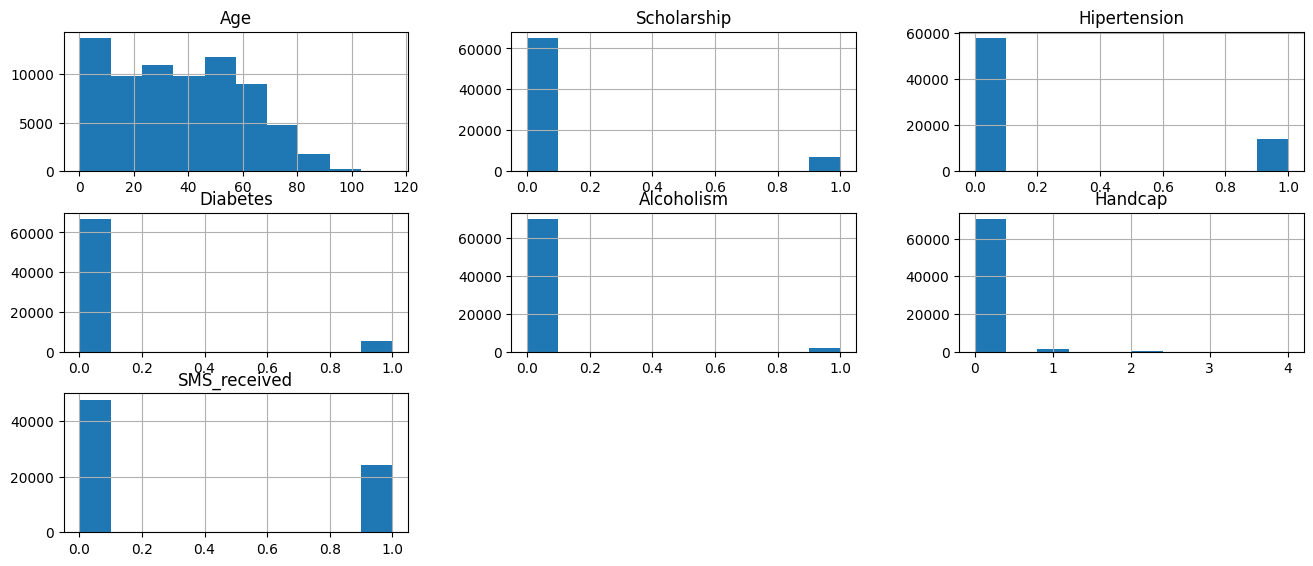

In [20]:
df.hist(figsize=(16,6.5));

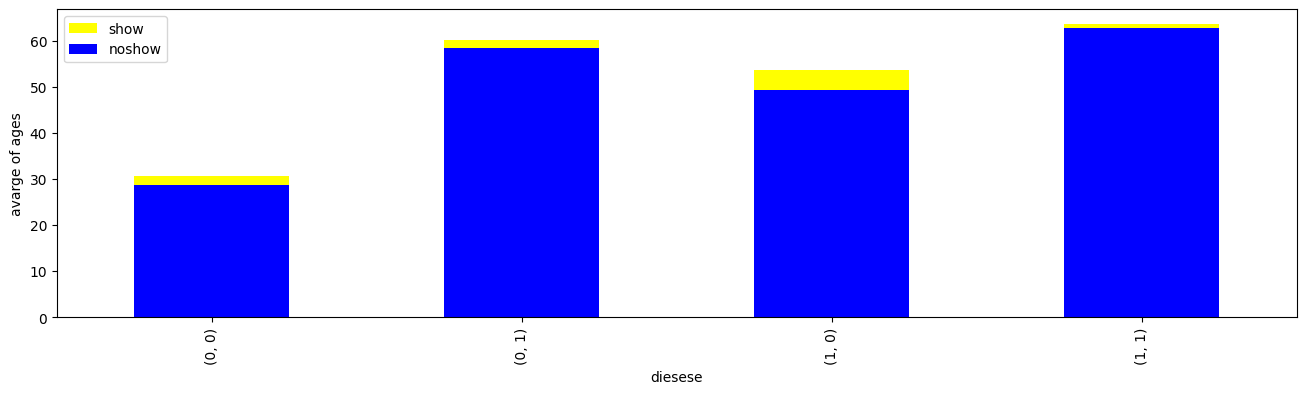

In [21]:
plt.figure(figsize=[16,4])
df[show].groupby(['Diabetes','Hipertension'])['Age'].mean().plot(kind='bar',color="yellow",label="show")
df[noshow].groupby(['Diabetes','Hipertension'])['Age'].mean().plot(kind='bar',color="blue",label="noshow")
plt.xlabel("diesese")
plt.ylabel("avarge of ages")
plt.legend();

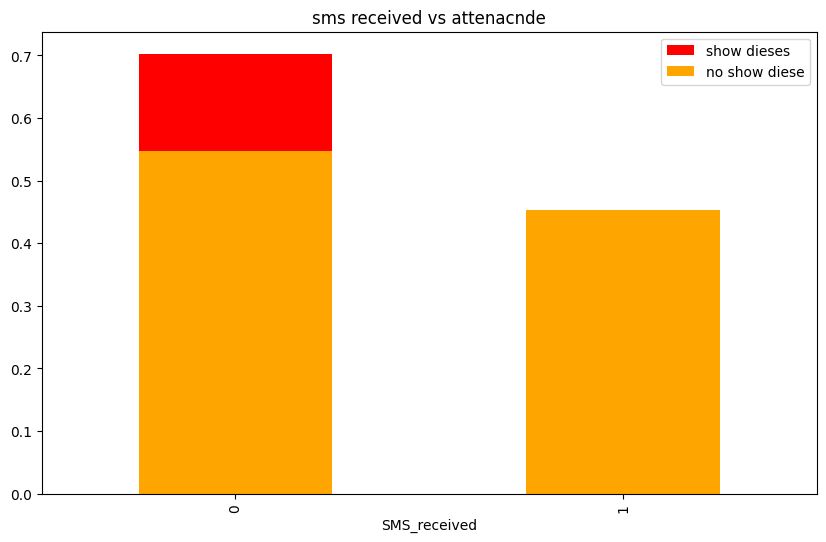

In [22]:
fig,ax=plt.subplots(figsize=(10,6))
df["SMS_received"][show].value_counts(normalize=True).plot(kind="bar",label="show dieses",ax=ax,color="red")
df["SMS_received"][noshow].value_counts(normalize=True).plot(kind="bar",label="no show diese",ax=ax,color="orange")
plt.legend()
plt.title("sms received vs attenacnde");

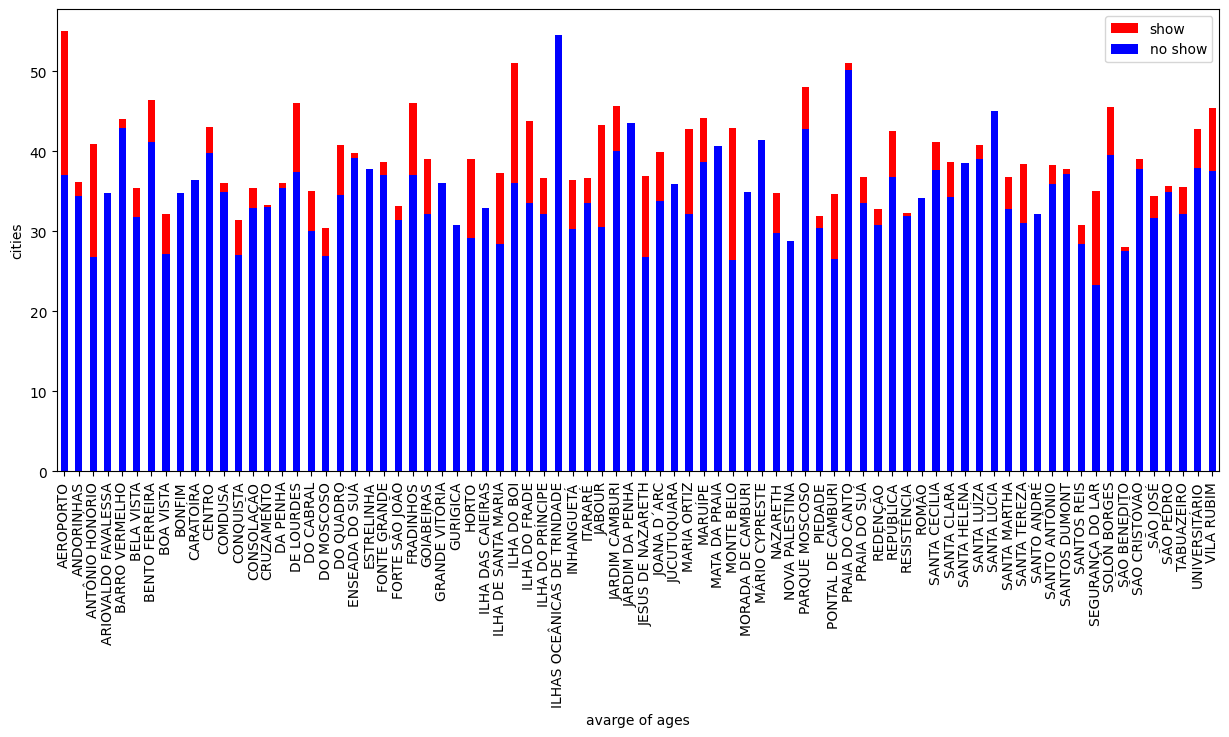

In [23]:
plt.figure(figsize=(15,6))
df[show].groupby(['Neighbourhood'])['Age'].mean().plot(kind="bar",label="show",color="red");
df[noshow].groupby(['Neighbourhood'])['Age'].mean().plot(kind="bar",label="no show",color="blue")
plt.ylabel("cities")
plt.xlabel("avarge of ages")
plt.legend();